In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
my_cmap = ListedColormap(sns.diverging_palette(220, 20, n=256).as_hex())

sys.path.append('../src')
import analyze
import raybay

In [2]:
folder = 'ZZ_MK_LLLungSBRT3977'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
bayes2 = np.load(folder + '/reduce/res_linquad_gp_minimize.pkl', allow_pickle=True)
bayes3 = np.load(folder + '/reduce2/res_linquad_gp_minimize.pkl', allow_pickle=True)

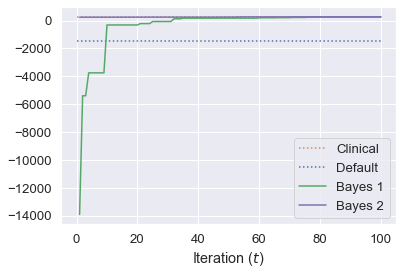

In [18]:
colors = sns.color_palette()
plt.plot([0, 100],
         [raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]],
         ':', color=colors[1])
plt.plot([0, 100],
         [raybay.get_utility(bayes.goal_df, default.goal_dict)[0], raybay.get_utility(bayes.goal_df, default.goal_dict)[0]],
         ':', color=colors[0])
plt.plot(np.arange(1, 101), -np.minimum.accumulate(bayes.opt_result.func_vals), color=colors[2])
#plt.plot(np.arange(1, 101), -np.minimum.accumulate(bayes2.opt_result.func_vals), color=colors[3])
plt.plot(np.arange(1, 101), -np.minimum.accumulate(bayes3.opt_result.func_vals), color=colors[4])
plt.xlabel('Iteration ($t$)')
#plt.ylabel('Linear-Quadratic Utility ($g$)')
plt.legend(['Clinical', 'Default', 'Bayes 1', 'Bayes 2', 'Bayes 3'])
plt.savefig('convDim1_labels.png', dpi=300, bbox_inches='tight')

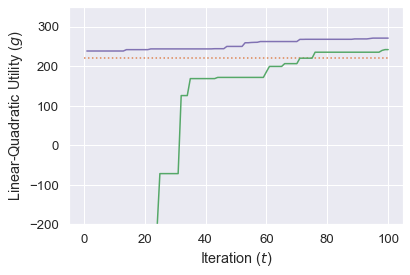

In [17]:
plt.plot([0, 100],
         [raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]],
         ':', color=colors[1])
plt.plot(np.arange(1, 101), -np.minimum.accumulate(bayes.opt_result.func_vals), color=colors[2])
#plt.plot(np.arange(1, 101), -np.minimum.accumulate(bayes2.opt_result.func_vals), color=colors[3])
plt.plot(np.arange(1, 101), -np.minimum.accumulate(bayes3.opt_result.func_vals), color=colors[4])
plt.xlabel('Iteration ($t$)')
plt.ylabel('Linear-Quadratic Utility ($g$)')
plt.ylim(-200, 350)
plt.savefig('convDim2_labels.png', dpi=300, bbox_inches='tight')

In [24]:
np.argmin(bayes3.opt_result.func_vals)

94

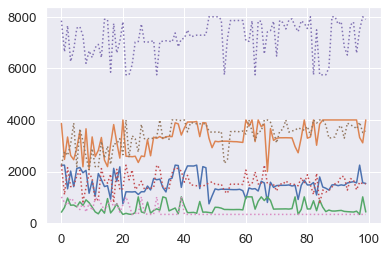

In [12]:
plt.plot(bayes3.opt_result.x_iters)
plt.plot(bayes2.opt_result.x_iters, ':')

(-300.0, 300.0)

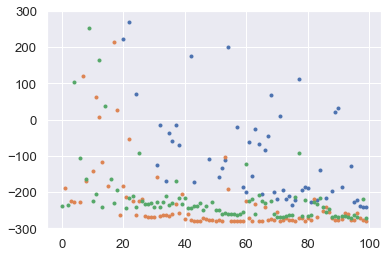

In [10]:
plt.plot(bayes.opt_result.func_vals, '.')
plt.plot(bayes2.opt_result.func_vals, '.')
plt.plot(bayes3.opt_result.func_vals, '.')
plt.ylim([-300, 300])

(-500.0, 350.0)

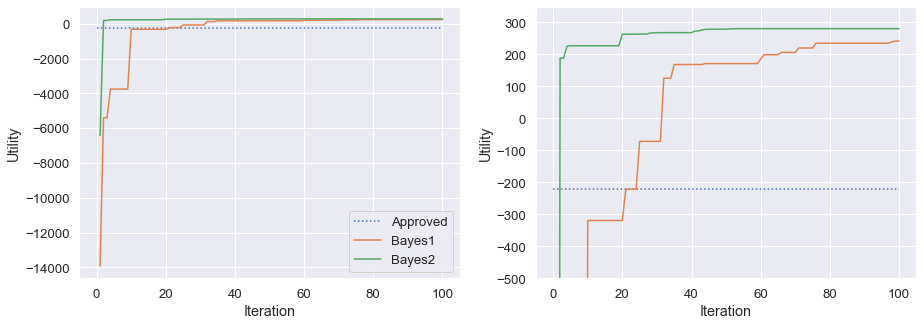

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot([0, 100], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
ax[0].plot(np.arange(1, 101), -np.minimum.accumulate(bayes.opt_result.func_vals))
ax[0].plot(np.arange(1, 101), -np.minimum.accumulate(bayes2.opt_result.func_vals))
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Utility')
ax[0].legend(['Approved', 'Bayes1', 'Bayes2'])

ax[1].plot([0, 100], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
ax[1].plot(np.arange(1, 101), -np.minimum.accumulate(bayes.opt_result.func_vals))
ax[1].plot(np.arange(1, 101), -np.minimum.accumulate(bayes2.opt_result.func_vals))
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Utility')
ax[1].set_ylim(-500, 350)

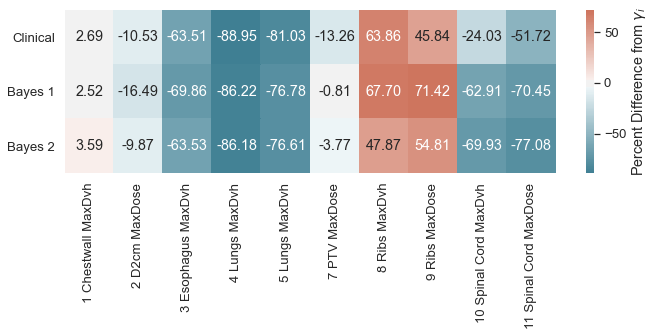

In [25]:
val_list = []
roi_dict = {}

res_list = [
    [approved, bayes, bayes2],
]

k = 0
roi_names = ['Chestwall', 'D2cm', 'Esophagus', 'Lungs', 'Lungs', 'PTV', 'Ribs', 'Ribs', 'Spinal Cord', 'Spinal Cord']
for index, row in bayes.goal_df.iterrows():
    goal_vals = []
    
    if index != 5:
        roi_dict[f"{index + 1} {roi_names[k]} {row['Type']}"] = index + 1
        
        for res in res_list:
            idx_bayes1 = np.argmin(res[1].opt_result.func_vals)
            idx_bayes2 = np.argmin(res[2].opt_result.func_vals)
            level = res[0].goal_df.iloc[index]['AcceptanceLevel']
            val = res[0].goal_dict[index][0]
            goal_vals.append(100*(val - level)/level)
            val = res[1].goal_dict[index][idx_bayes1]
            goal_vals.append(100*(val - level)/level)
            val = res[2].goal_dict[index][idx_bayes2]
            goal_vals.append(100*(val - level)/level)

        val_list.append(goal_vals)
        k += 1
        
columns = ['Clinical', 'Bayes 1', 'Bayes 2']
val_df = pd.DataFrame(columns=columns, data=val_list, index=roi_dict)
ncols = len(columns)
fig, ax = plt.subplots(1, figsize=(len(bayes.goal_df), ncols))
sns.heatmap(val_df.transpose(), cmap=sns.diverging_palette(220, 20, n=256), center=0,
            annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference from $\gamma_i$'}, ax=ax)
plt.yticks(rotation='horizontal')
plt.savefig('dimDiffGoal_labels.png', dpi=300, bbox_inches='tight')

In [20]:
val_list = []
roi_dict = {}

res_list = [
    [approved, bayes, bayes2],
]

for index, row in bayes.goal_df.iterrows():
    goal_vals = []
    
    if index != 5:
        roi_dict[f"{index + 1} {row['Roi']} {row['Type']}"] = index + 1
        
        for res in res_list:
            idx_bayes1 = np.argmin(res[1].opt_result.func_vals)
            idx_bayes2 = np.argmin(res[2].opt_result.func_vals)
            level = res[0].goal_dict[index][0]
            val = res[1].goal_dict[index][idx_bayes]
            goal_vals.append(100*(val - level)/level)
            val = res[2].goal_dict[index][idx_bayes]
            goal_vals.append(100*(val - level)/level)

        val_list.append(goal_vals)
        
columns = ['Bayes1', 'Bayes2']
val_df = pd.DataFrame(columns=columns, data=val_list, index=roi_dict)
ncols = len(columns)
fig, ax = plt.subplots(1, figsize=(len(bayes.goal_df), ncols))
sns.heatmap(val_df.transpose(), cmap=sns.diverging_palette(220, 20, n=256), center=0,
            annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference from Accepted'}, ax=ax)
plt.yticks(rotation='horizontal')
plt.savefig('dimDiffApproved.png', bbox_inches='tight', dpi=300)

NameError: name 'idx_bayes' is not defined

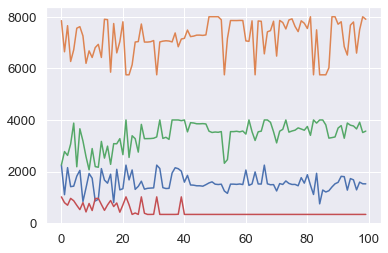

In [45]:
plt.plot(bayes2.opt_result.x_iters)

In [46]:
bayes2.opt_result.x

[1513.205185916072, 7853.801305616365, 3548.536709360089, 340.0]

In [48]:
bayes.opt_result.x

[2981.2404882605642,
 1149.522337104297,
 470.0,
 290.0,
 1002.8875764537931,
 7807.828156170102,
 3200.0,
 3534.0740212886653,
 340.0,
 650.0]

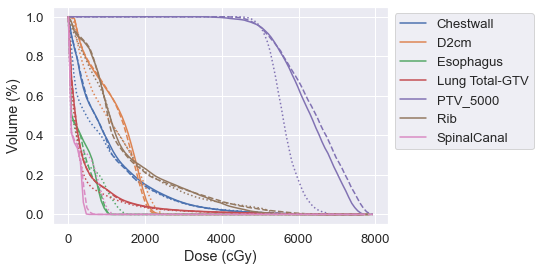

In [74]:
plt.figure()
# if normalize:
#     idx = np.argmin(bayes.opt_result.func_vals)
#     coeff = bayes.goal_dict[6][idx]/bayes.dvh_dict['Dose'][-1]
# else:
coeff = 1.0
colors = sns.color_palette()
names = list(approved.roi_list)
names.sort()
handles = []
for ii, roi in enumerate(names):
    color = colors[ii]
    plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi],':',color=color)
    plt.plot(bayes.dvh_dict['Dose'], bayes.dvh_dict[roi],'--', color=color)
    p, = plt.plot(coeff*bayes2.dvh_dict['Dose'], bayes2.dvh_dict[roi],color=color)
    handles.append(p)
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.legend(handles, names, bbox_to_anchor=(1, 1))
plt.savefig('dimDVH.png', bbox_inches='tight', dpi=300)

In [ ]:
dvhplot('ZZ_MK_LLLungSBRT3977', 'dvh5.png')

In [58]:
colors

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [84]:
bayes2.func_df = raybay.get_funcs('ZZ_MK_LLLungSBRT3977/reduce/funcs.csv')

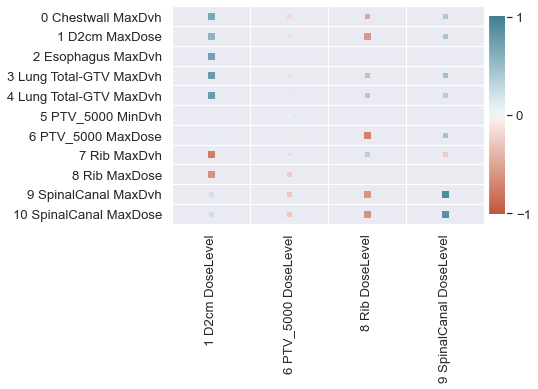

In [86]:
bayes2.corrplot('pars')

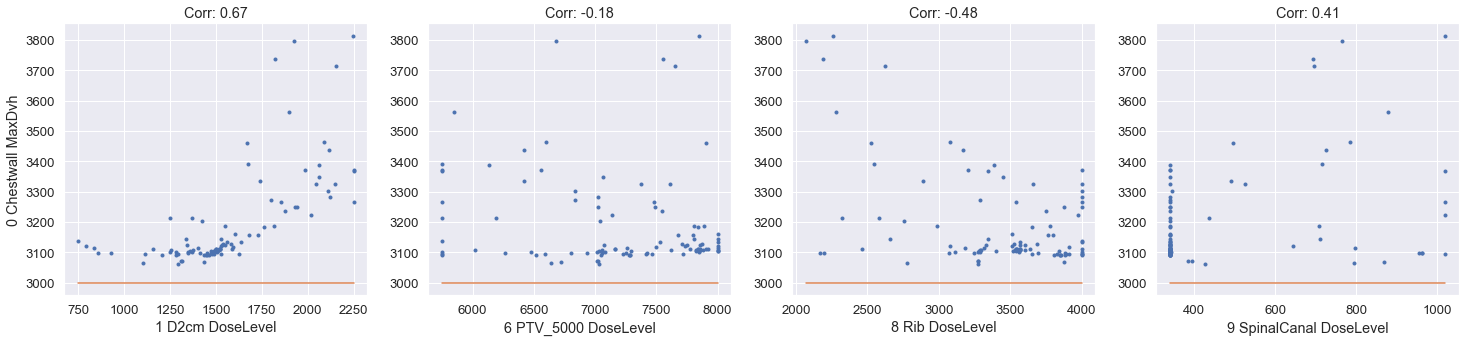

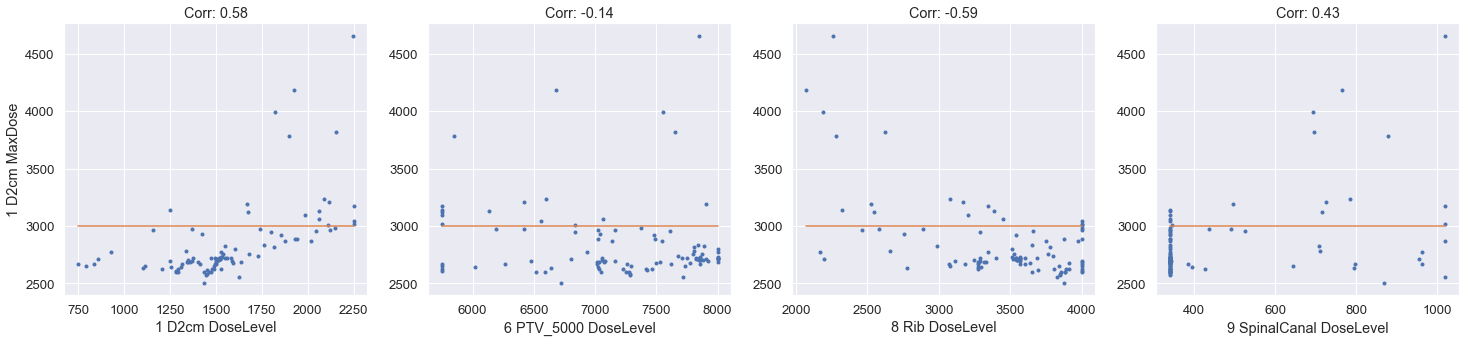

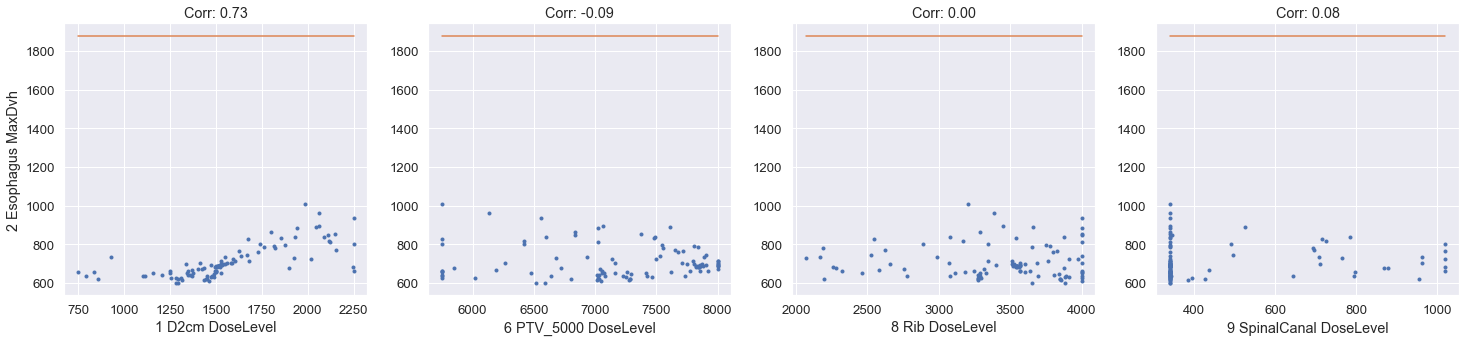

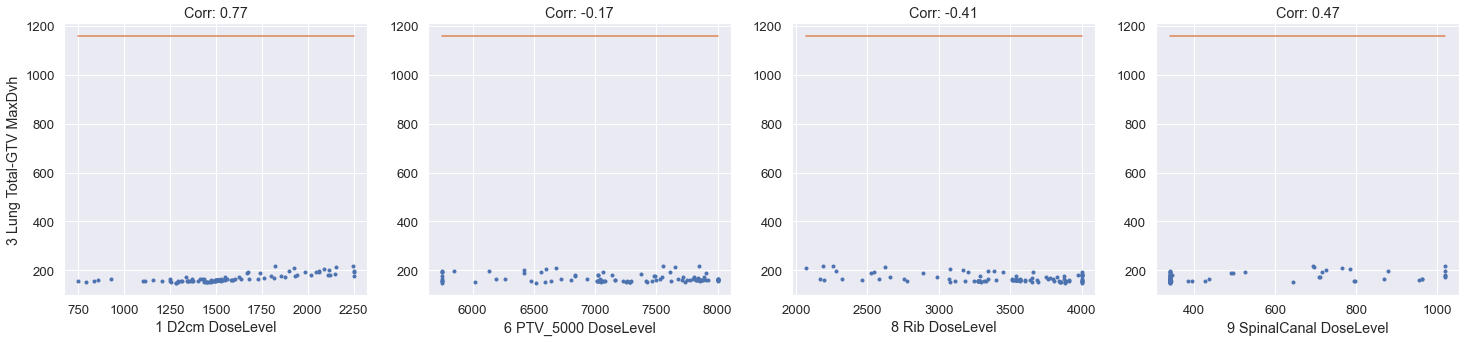

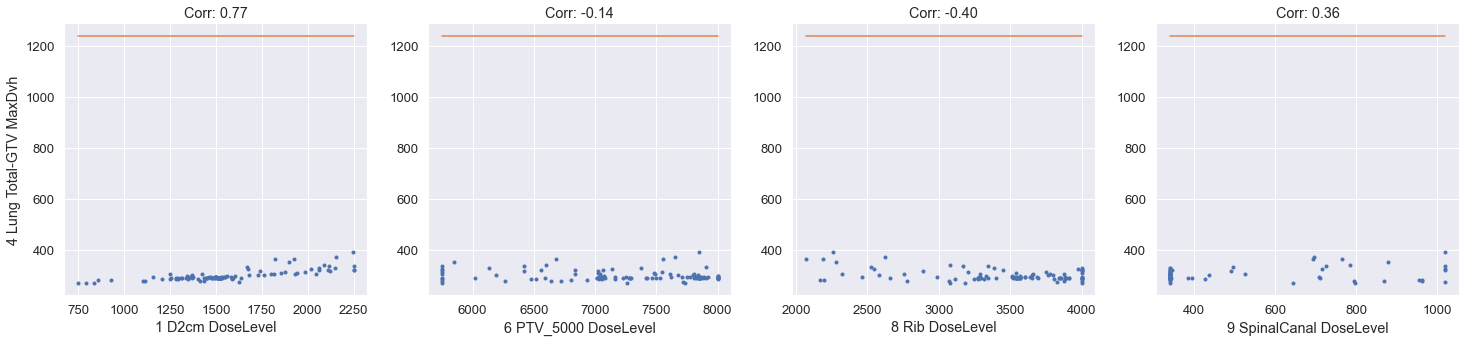

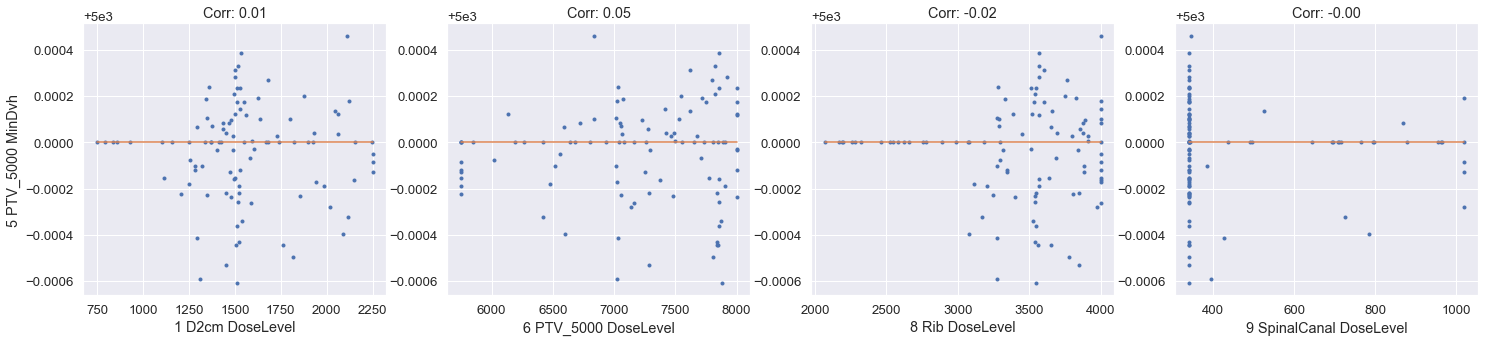

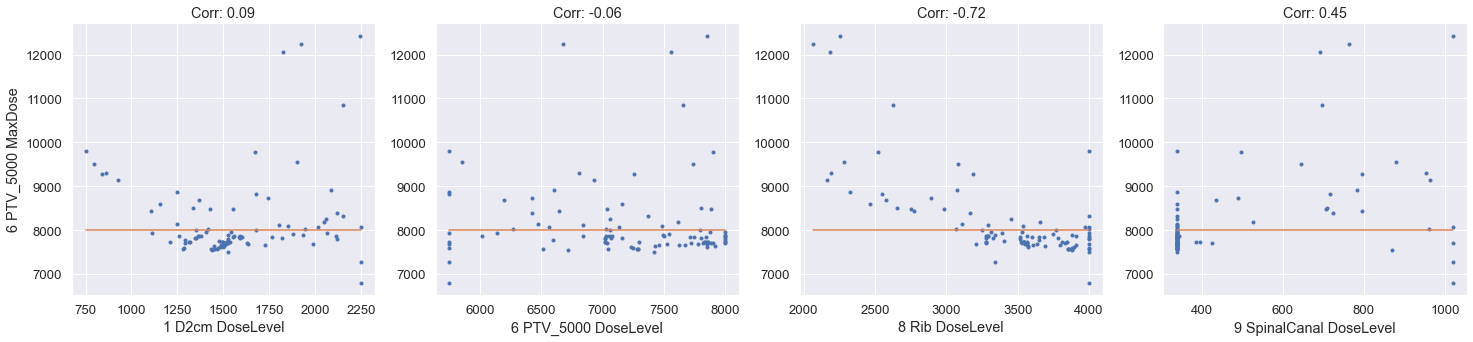

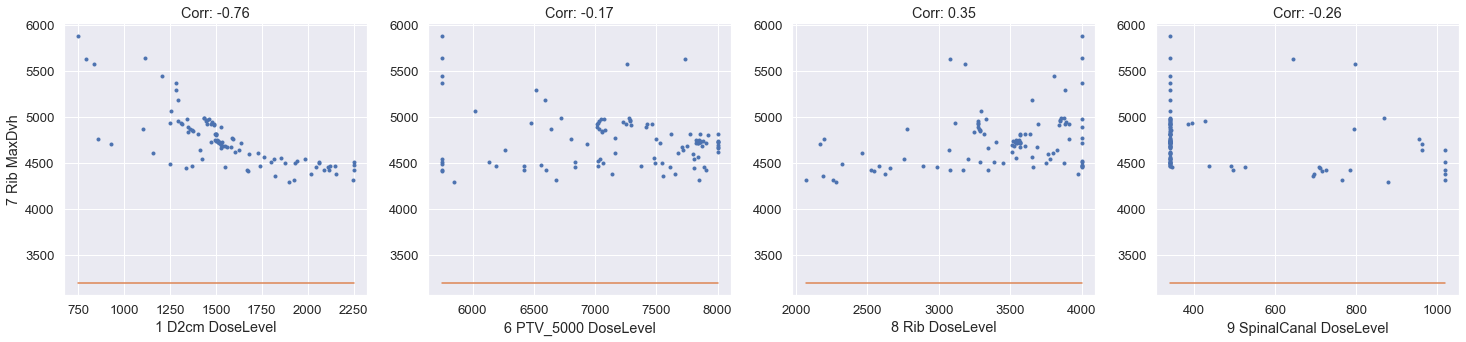

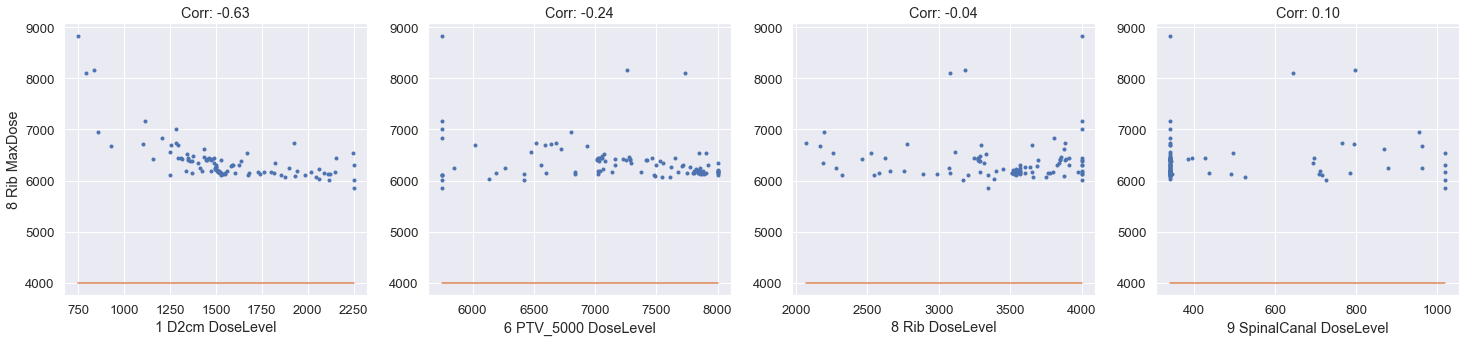

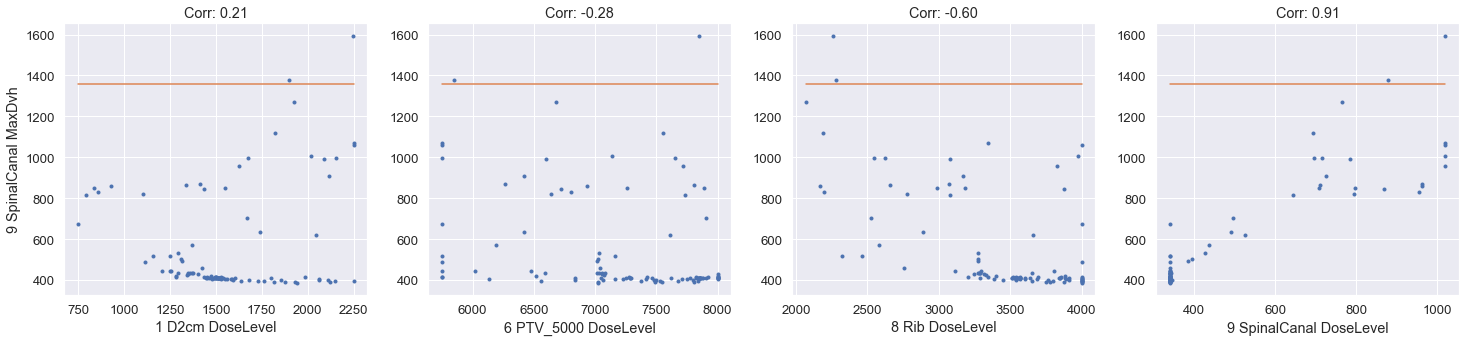

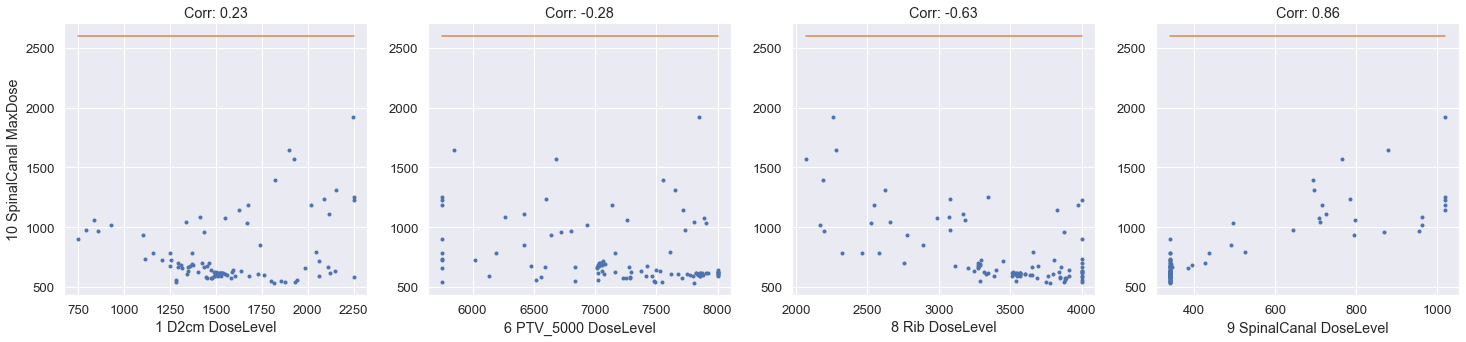

In [87]:
bayes2.scatterplot('pars')

In [88]:
bayes2.opt_result.x

[1513.205185916072, 7853.801305616365, 3548.536709360089, 340.0]

In [89]:
bayes.opt_result.x

[2981.2404882605642,
 1149.522337104297,
 470.0,
 290.0,
 1002.8875764537931,
 7807.828156170102,
 3200.0,
 3534.0740212886653,
 340.0,
 650.0]

In [93]:
(bayes2.time - bayes.time)/bayes.time*100

-0.1149249561838478

In [91]:
bayes2.time

8174.749986171722

In [94]:
np.argmin(bayes.opt_result.func_vals)

98

In [95]:
np.argmin(bayes2.opt_result.func_vals)

55

In [100]:
bayes2.opt_result.fun

-280.70266983606945

In [101]:
(280-240)/240

0.16666666666666666